## Non llm based sequential workflow (simple linear)

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
# define a state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str
   

In [18]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state["weight_kg"]
    height = state["height_m"]

    bmi = weight/(height**2)

    state["bmi"]=round(bmi,2)
    return state          # Returns the updated state dictionary, now containing the BMI value.

In [24]:
def label_bmi(state: BMIState)->BMIState:
    
    bmi =state['bmi']
    
    if bmi < 18.5:
      state["category"] = "Underweight"
    elif bmi <= 25:
      state["category"] = "Normal"
    elif bmi < 30:
       state["category"] = "Overweight"
    else:
       state["category"] = "Obese"
    return state



In [25]:
# define the graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node('label_bmi',label_bmi)

# Add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

# compile the graph
workflow = graph.compile()




In [26]:
initial_state= {'weight_kg':4, 'height_m':1.45} 
final_output = workflow.invoke(initial_state)
print(final_output)

{'weight_kg': 4, 'height_m': 1.45, 'category': 'Underweight', 'bmi': 1.9}


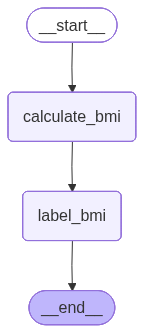

In [27]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())